In [ ]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns


In [120]:
train_df=pd.read_csv('train.csv')

In [121]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing

In [122]:
df=train_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [123]:
label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex'])

In [124]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df = pd.concat([df, one_hot_df], axis=1)

df = df.drop(categorical_columns, axis=1)
print(f"Encoded Employee data : \n{df}")

Encoded Employee data : 
     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  \
0           0       3    1  22.0      1      0   7.2500         0.0   
1           1       1    0  38.0      1      0  71.2833         1.0   
2           1       3    0  26.0      0      0   7.9250         0.0   
3           1       1    0  35.0      1      0  53.1000         0.0   
4           0       3    1  35.0      0      0   8.0500         0.0   
..        ...     ...  ...   ...    ...    ...      ...         ...   
886         0       2    1  27.0      0      0  13.0000         0.0   
887         1       1    0  19.0      0      0  30.0000         0.0   
888         0       3    0   NaN      1      2  23.4500         0.0   
889         1       1    1  26.0      0      0  30.0000         1.0   
890         0       3    1  32.0      0      0   7.7500         0.0   

     Embarked_Q  Embarked_S  Embarked_nan  
0           0.0         1.0           0.0  
1           0.0         0.0       

<Axes: >

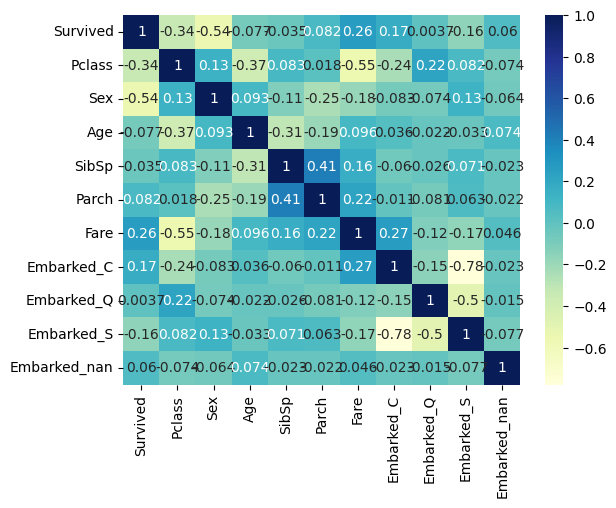

In [125]:
corr_mat = df.corr(numeric_only=True)
sns.heatmap(corr_mat, cmap="YlGnBu", annot=True)

In [126]:
X=df.drop(["Survived"],axis=1)
y=df[['Survived']]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models

## Random Forest Classifier

In [128]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/Users/elliebarranbeck/ds-projects/Titanic/.venv/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [129]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.24%
